In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
#inmport data
df = pd.read_csv('data/Xeek_Well_15-9-15.csv')

In [3]:
#get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       17717 non-null  object 
 1   DEPTH_MD   17717 non-null  float64
 2   GROUP      17717 non-null  object 
 3   FORMATION  15093 non-null  object 
 4   CALI       17635 non-null  float64
 5   RDEP       17717 non-null  float64
 6   RHOB       17521 non-null  float64
 7   GR         17717 non-null  float64
 8   NPHI       13346 non-null  float64
 9   PEF        17662 non-null  float64
 10  DTC        17708 non-null  float64
 11  LITH       17717 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [4]:
#drop missing values
df.dropna(inplace=True)

In [5]:
#reconfirm data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13290 entries, 4371 to 17707
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       13290 non-null  object 
 1   DEPTH_MD   13290 non-null  float64
 2   GROUP      13290 non-null  object 
 3   FORMATION  13290 non-null  object 
 4   CALI       13290 non-null  float64
 5   RDEP       13290 non-null  float64
 6   RHOB       13290 non-null  float64
 7   GR         13290 non-null  float64
 8   NPHI       13290 non-null  float64
 9   PEF        13290 non-null  float64
 10  DTC        13290 non-null  float64
 11  LITH       13290 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.3+ MB


Using 2 Features for Isolation Forest

In [6]:
#place a selection of features for modelling into a list
anomaly_inputs = ['NPHI', 'RHOB']

In [7]:
#define isolaton forest model
IF_model = IsolationForest(contamination = 0.1, random_state = 42)

In [8]:
#fit model to data
IF_model.fit(df[anomaly_inputs])

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [9]:
#create a column containing the decision function of each sample
df['anomaly_score'] = IF_model.decision_function(df[anomaly_inputs])

In [10]:
#create a column containing the anomaly prediction of each sample
df['anomaly'] = IF_model.predict(df[anomaly_inputs])

In [11]:
#slice dataframe to only include a few columns
df.loc[:, ['NPHI', 'RHOB', 'anomaly_score', 'anomaly']]

,NPHI,RHOB,anomaly_score,anomaly
4371,0.541850,2.063168,0.094522,1
4372,0.545401,2.051136,0.095207,1
4373,0.548953,2.041540,0.099837,1
4374,0.549356,2.035698,0.105620,1
4375,0.543351,2.029099,0.117897,1
...,...,...,...,...
17703,0.257656,2.391858,0.108037,1
17704,0.264047,2.408428,0.088239,1
17705,0.269605,2.432385,0.075509,1
17706,0.270624,2.452091,0.058709,1


In [37]:
#create a model to view a flexible scatter plot
def outlier_plot(data, outlier_method_name, x_var, y_var, xaxis_limits = [0, 1], yaxis_limits = [0, 1]):
    #print the outlier detection method name
    # print('Outlier Detection Method: {}'.format(outlier_method_name))
    print(f'Outlier Detection Method: {outlier_method_name}')
    method = f'{outlier_method_name}_anomaly'
    #print the number of anomalies detected
    print('Number of anomalies detected: {}'.format(len(data[data['anomaly'] == -1])))
    #print the number of normal samples
    print('Number of normal samples: {}'.format(len(data[data['anomaly'] == 1])))
    #print the number of total samples
    print('Total number of samples: {}'.format(len(data)))

    #create a scatter plot
    g = sns.FacetGrid(data, col ='anomaly', hue = 'anomaly', height = 4, hue_order = [1, -1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Detection Method: {outlier_method_name}', y = 1.10, fontweight = 'bold')
    g.set(xlim = xaxis_limits, ylim = yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly'] == -1])} points")
    axes[1].set_title(f"Non-Outliers\n{len(data[data['anomaly'] == 1])} points")
    return g

Outlier Detection Method: Isolation Forest
Number of anomalies detected: 1329
Number of normal samples: 11961
Total number of samples: 13290


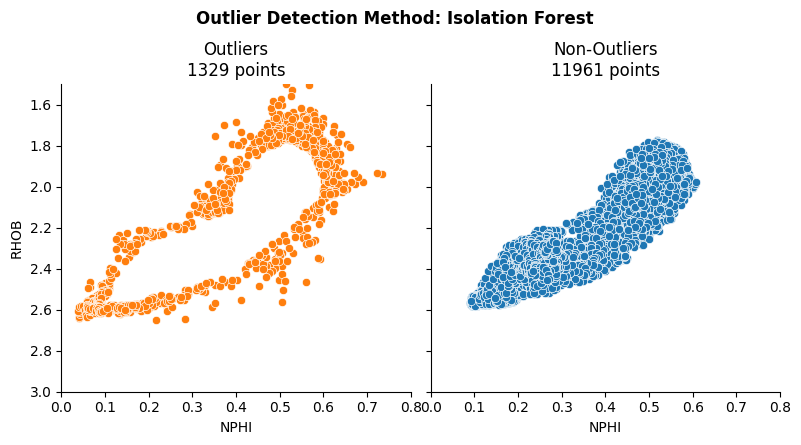

In [38]:
#call the function to create a scatter plot
outlier_plot(df, "Isolation Forest", "NPHI", "RHOB", xaxis_limits = [0, 0.8], yaxis_limits = [3, 1.5])

Using Multiple Features for Isolation Forest

In [39]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']

In [40]:
#define isolaton forest model
IF_model = IsolationForest(contamination = 0.1, random_state = 42)

#fit model to data
IF_model.fit(df[anomaly_inputs])

#create a column containing the decision function of each sample
df['anomaly_score'] = IF_model.decision_function(df[anomaly_inputs])

#create a column containing the anomaly prediction of each sample
df['anomaly'] = IF_model.predict(df[anomaly_inputs])

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Detection Method: Isolation Forest
Number of anomalies detected: 1329
Number of normal samples: 11961
Total number of samples: 13290


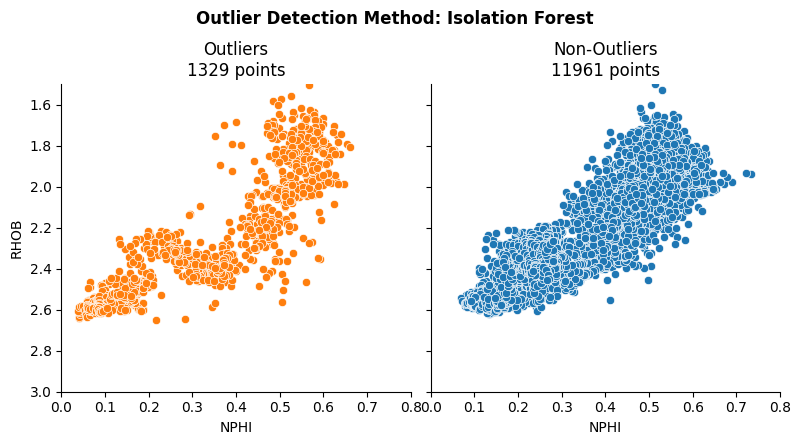

In [41]:
#call the function to create a scatter plot
outlier_plot(df, "Isolation Forest", "NPHI", "RHOB", xaxis_limits = [0, 0.8], yaxis_limits = [3, 1.5])

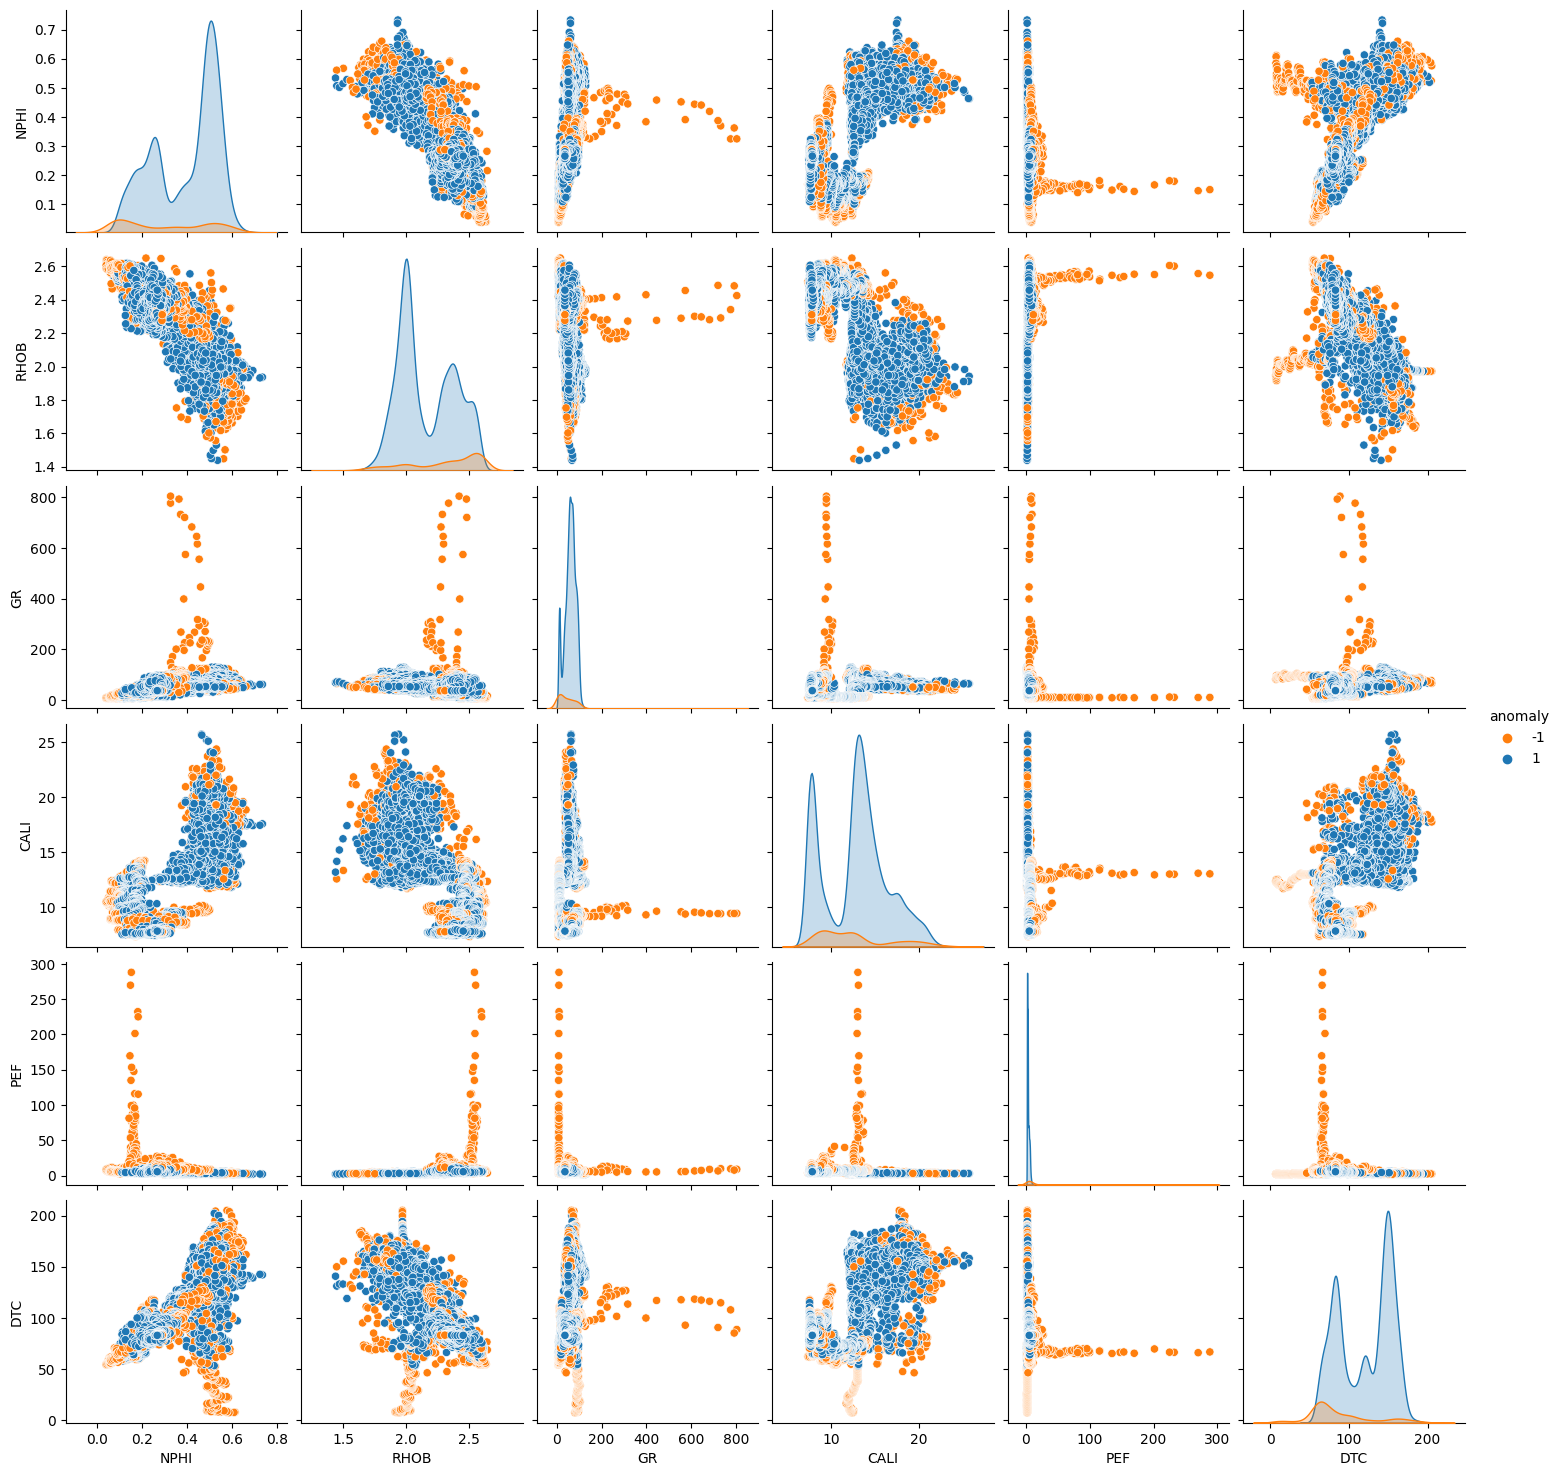

In [42]:
#set pallete to ff7f0e and 1f77b4
pallete = ['#ff7f0e', '#1f77b4']

#call the pair plot function
sns.pairplot(df, vars = anomaly_inputs, hue = 'anomaly', palette = pallete)